# BG Stats

In [2]:
import pandas as pd
import pathlib
from bggapi import BGGAPI
from tqdm import tqdm
import time
import json

import matplotlib.pyplot as plt

pd.options.display.max_columns = 500

In [161]:
stats_file = pathlib.Path("..") / "data" / "BGStats" / "BGStatsExport March 2022.json"
game_meta_file = pathlib.Path("..") / "data" / "BGStats" / "games_meta.json"

with stats_file.open() as file:
    stats_original_data = json.load(file)

if game_meta_file.is_file():
    with game_meta_file.open() as file:
        game_meta_data = json.load(file)
    weight_set = set(pd.DataFrame(game_meta_data)["bggId"])
else:
    game_meta_data = []
    weight_set = set([])


## Collect Tags

In [163]:
game_tag = pd.DataFrame(stats_original_data["tags"])

## Groups

In [164]:
stats_groups = pd.DataFrame(stats_original_data["groups"])

## Players

In [165]:
players = pd.DataFrame(stats_original_data["players"])
players_dict = players.set_index("id")["name"].to_dict()

## Games

In [167]:
stats_games = pd.DataFrame(stats_original_data["games"])

meta_dict = []
weight_dict = []

api = BGGAPI()
count = 0
count2 = 0
for index, row in tqdm(stats_games.iterrows(), desc="Games", total=len(stats_games)):
    try:
        meta_dict.append({"id": row["bggId"], "meta": json.loads(row["metaData"])["CollectionHistory"].values()})
    except Exception as e:
        count += 1
    if not row["bggId"] in weight_set:
        try:
            game_meta_data.append(api.populate_game_info(row["bggId"]))
            time.sleep(10 / 6)
        except:
            count2 += 1

print(f"{count} broken meta data files")
print(f"{count2} broken weight fetches")
stats_games = stats_games.drop("metaData", axis=1).merge(pd.DataFrame(meta_dict).rename({"id": "bggId"}, axis=1),
                                                         on="bggId", how="left")
stats_games = stats_games.merge(pd.DataFrame(game_meta_data), on="bggId", how="left")

Games: 100%|██████████| 511/511 [00:00<00:00, 743.08it/s]

257 broken meta data files
2 broken weight fetches


,uuid,id,name,modificationDate,cooperative,highestWins,noPoints,usesTeams,urlThumb,urlImage,bggName,bggYear,bggId,designers,tags,isBaseGame,isExpansion,rating,minPlayerCount,maxPlayerCount,minPlayTime,maxPlayTime,minAge,preferredImage,copies,meta,weight
0,037e9b0d-d93c-4bcf-9cb6-b6ab6ed8aa19,1,1817,2022-02-23 21:26:16,False,True,False,False,https://cf.geekdo-images.com/ljswtJbDAR_bcgSkF...,https://cf.geekdo-images.com/ljswtJbDAR_bcgSkF...,1817,2010,63170,"Craig Bartell, Tim Flowers","[{'tagRefId': 1}, {'tagRefId': 19, 'bggPinId':...",1.0,0.0,0,3,7,360,540,16,0,[],(0),4.7273
1,4bc2aa82-bb32-4005-8d93-e8db3de011ac,2,1846: The Race for the Midwest,2022-02-23 21:26:17,False,True,False,False,https://cf.geekdo-images.com/zRZkmUtRhHosQNrcs...,https://cf.geekdo-images.com/zRZkmUtRhHosQNrcs...,1846: The Race for the Midwest,2005,17405,Thomas Lehmann,"[{'tagRefId': 1}, {'tagRefId': 19, 'bggPinId':...",1.0,0.0,0,3,5,240,240,14,0,[],(0),3.9632
2,d4b3d334-150e-4d8f-8cca-ba2ec3913865,3,1860: Railways on the Isle of Wight,2022-02-23 21:26:16,False,True,False,False,https://cf.geekdo-images.com/VVehvyR-9kb_Kht7g...,https://cf.geekdo-images.com/VVehvyR-9kb_Kht7g...,1860: Railways on the Isle of Wight,2004,12750,Mike Hutton,"[{'tagRefId': 1}, {'tagRefId': 19, 'bggPinId':...",1.0,0.0,0,2,4,240,240,13,0,[],(0),4.0959
3,efc9a318-875a-4d31-b4ad-7b47b9a5a49a,4,1882: Assiniboia,2022-02-23 21:26:16,False,True,False,False,https://cf.geekdo-images.com/EoZQyUiTIiprEC-pv...,https://cf.geekdo-images.com/EoZQyUiTIiprEC-pv...,1882: Assiniboia,2019,282435,Marc Voyer,"[{'tagRefId': 1}, {'tagRefId': 19, 'bggPinId':...",1.0,0.0,0,2,6,120,180,14,0,[],(0),3.8667
4,b1d32c81-df1e-40d5-9adf-13a676e512bb,5,1889: History of Shikoku Railways,2022-02-23 21:26:16,False,True,False,False,https://cf.geekdo-images.com/QlV0LtrkwUWBnpqXZ...,https://cf.geekdo-images.com/QlV0LtrkwUWBnpqXZ...,1889: History of Shikoku Railways,2004,23540,Yasutaka Ikeda,"[{'tagRefId': 1}, {'tagRefId': 19, 'bggPinId':...",1.0,0.0,0,2,6,210,210,14,0,[],(0),3.9130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,a0852cd1-89ff-4d69-9209-12da393b8969,501,Wingspan: Oceania Expansion,2022-02-23 21:26:17,False,True,False,False,https://cf.geekdo-images.com/Nl_5PvrmI6aS-1qqi...,https://cf.geekdo-images.com/Nl_5PvrmI6aS-1qqi...,Wingspan: Oceania Expansion,2020,300580,Elizabeth Hargrave,"[{'tagRefId': 21, 'bggPinId': 7843357}]",0.0,1.0,0,1,5,40,70,10,0,[],NaN,2.6190
507,14e66e8d-1368-4fc2-b6f2-d9b99af9bad4,367,Wiz-War (eighth edition),2021-12-26 07:50:01,False,True,False,False,https://cf.geekdo-images.com/thumb/img/M0Sr0UQ...,https://cf.geekdo-images.com/original/img/fdky...,Wiz-War (eighth edition),2012,104710,"Tom Jolly, Kevin Wilson",[{'tagRefId': 1}],1.0,0.0,0,2,4,30,60,14,0,[],NaN,2.3251
508,18b8fe9c-2a0d-4449-a093-8751b2a16205,368,World Championship Russian Roulette,2020-07-05 19:38:58,False,True,False,False,https://cf.geekdo-images.com/thumb/img/NVWeSS8...,https://cf.geekdo-images.com/original/img/SgRm...,World Championship Russian Roulette,2017,179245,Anthony Burch,[{'tagRefId': 1}],1.0,0.0,0,2,6,20,30,12,0,[],NaN,1.3333
509,5fda90f4-20f0-411f-9f28-3f46b6bcf885,369,Yamataï,2022-02-23 21:26:16,False,True,False,False,https://cf.geekdo-images.com/thumb/img/6hOM_W9...,https://cf.geekdo-images.com/original/img/ej-k...,Yamataï,2017,213893,"Bruno Cathala, Marc Paquien","[{'tagRefId': 1}, {'tagRefId': 7, 'bggPinId': ...",1.0,0.0,0,2,4,40,80,13,0,[],NaN,2.9560


In [8]:
with game_meta_file.open("w") as file:
    json.dump(game_meta_data, file)

In [153]:
collection_data = []
for id, game in stats_games.iterrows():
    copies = game["copies"]
    if len(copies) > 0:
        for copy in copies:
            if copy["statusOwned"]:
                meta = json.loads(copy["metaData"])
                copy.update(meta)
                collection_data.append(copy)
pd.DataFrame(collection_data)


,uuid,modificationDate,metaData,bggCollId,statusOwned,statusWishlist,statusWantToPlay,statusWantInTrade,statusForTrade,statusPrevOwned,statusPreordered,statusWantToBuy,wishlistStatus,versionName,bggVersionId,bggUserName,gameName,year,urlImage,urlThumb,test,FieldsAllowedToPost,VersionEmptiedInApp,PricePaid,PricePaidCurrency,PrivateComment,CurrentPrice,CurrentPriceCurrency,AcquiredFrom,AcquisitionDate,InventoryLocation,Quantity,Rating,VersionPublishers,VersionLanguages,PublicComment,WishlistComment,Barcode,InventoryDate,HaveParts,WantParts,TradeCondition
0,e0f4d81e-7367-4fb8-bf20-1cc8b087bb7b,2021-12-26 01:02:47,"{""FieldsAllowedToPost"":[],""VersionEmptiedInApp...",55916700,True,False,False,False,False,False,False,False,0,Feuerland English edition,585046.0,scod101,A Feast for Odin,2018,https://cf.geekdo-images.com/8pmwCyoPubtAP8fpm...,https://cf.geekdo-images.com/8pmwCyoPubtAP8fpm...,test,[],0.0,2250,,,2250,,Timeless Board Games,2019-08-19,,1,8,Feuerland Spiele,English,,,,,,,
1,de7d188b-727e-4104-ad99-01d09318e661,2021-12-26 01:02:47,"{""FieldsAllowedToPost"":[],""VersionEmptiedInApp...",62500914,True,False,False,False,False,False,False,False,0,English edition,419048.0,scod101,A Feast for Odin: The Norwegians,2019,https://cf.geekdo-images.com/hzgTiNWQ7Vh3Ywr9O...,https://cf.geekdo-images.com/hzgTiNWQ7Vh3Ywr9O...,test,[],0.0,850,,,850,,Timeless Board Games,2019-08-19,,1,9,Z-Man Games,English,,,,,,,
2,035e7738-54dd-4403-b9f1-40d7d0962aaa,2021-12-25 07:31:19,"{""VersionEmptiedInApp"":0,""VersionPublishers"":""...",43336782,True,False,False,False,False,False,False,False,4,English second edition,502046.0,scod101,Archipelago,2018,https://cf.geekdo-images.com/oePgdZ-E57t65lZHc...,https://cf.geekdo-images.com/oePgdZ-E57t65lZHc...,test,NaN,0.0,2125,,,1995,,Nexus,2020-09-24,Home,1,8,Ludically,English,,,,2020-09-24,,,
3,89286e72-c594-448b-bdd5-cbd5452c3909,2021-12-26 01:02:47,"{""FieldsAllowedToPost"":[],""VersionEmptiedInApp...",62860741,True,False,False,False,False,False,False,False,0,English edition,382433.0,scod101,Blood on the Clocktower,2022,https://cf.geekdo-images.com/6By7Sm8Nsy8M6SNfE...,https://cf.geekdo-images.com/6By7Sm8Nsy8M6SNfE...,test,[],0.0,,,,,,,,,,8,The Pandemonium Institute,English,Print and Play,,,,,,
4,5409b3ff-724f-4a2d-92a4-5e746849d8d9,2021-12-25 07:29:14,"{""VersionPublishers"":""Roxley"",""VersionLanguage...",88932375,True,False,False,False,False,False,False,False,0,English retail edition,351052.0,scod101,Brass: Birmingham,2018,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,test,NaN,0.0,1650,ZAR,,,,Timeless Boardgames,,,,,Roxley,English,,,,,,,
5,cc902ded-a511-45c0-8396-854a18cb394b,2021-12-26 01:02:47,"{""FieldsAllowedToPost"":[],""VersionEmptiedInApp...",26086430,True,False,False,False,False,False,False,False,0,English fourth edition 2012,261544.0,scod101,Catan,2012,https://cf.geekdo-images.com/_82k0XUTLdx15kqgo...,https://cf.geekdo-images.com/_82k0XUTLdx15kqgo...,test,[],0.0,,,,1150,,,,,1,7,Mayfair Games,English,,,,,,,
6,8fb6767e-2850-46ac-a9eb-98cfa98ebcd6,2021-12-26 01:02:48,"{""PricePaid"":"""",""PricePaidCurrency"":"""",""Privat...",26086432,True,False,False,False,False,False,False,False,0,English second edition 2013,314296.0,scod101,NaN,2013,https://cf.geekdo-images.com/sXMnbsBNzPY8k6pB9...,https://cf.geekdo-images.com/sXMnbsBNzPY8k6pB9...,test,NaN,NaN,,,,695,,,,,1,7,Mayfair Games,English,,,,,,,
7,d1ef4d6e-107f-42cc-b2d8-1303f0b1cd4d,2021-12-26 01:02:47,"{""VersionEmptiedInApp"":0,""PricePaid"":""70"",""Pri...",55817741,True,False,False,False,False,False,False,False,0,German edition,110496.0,scod101,Caverna: Die Höhlenbauern,2013,https://cf.geekdo-images.com/pI9JOCIzMPkp4EXQW...,https://cf.geekdo-images.com/pI9JOCIzMPkp4EXQW...,test,NaN,0.0,70,EUR,,2050,,Funtainment Munich,2019-04-20,,,9,Lookout Games,German,,,,,,,
8,cc035967-88c7-4de9-a052-dc5efc058975,2021-12-26 01:02:47,"{""VersionPublishers"":""Lookout Games"",""VersionL...",60201210,True,False,Fals

## Plays

In [10]:
# stats_original_data["plays"][0]
stats_plays = pd.DataFrame(stats_original_data["plays"])

stats_plays = stats_plays.merge(stats_games[["weight", "id", "name"]].rename({"id": "gameRefId"}, axis=1),
                                on="gameRefId", how="left")
stats_plays["playDate"] = pd.to_datetime(stats_plays["playDate"])

## Player Scores extraction:

In [76]:
player_scores = []
for id, game in stats_plays.iterrows():
    name = game["name"]
    game_id = game["bggId"]
    play_date = game["playDate"]
    for score in game["playerScores"]:
        final = {"name": name, "play_id": game_id, "play_date": play_date}
        final.update(score)
        final.update({"players": players_dict[score["playerRefId"]]})
        player_scores.append(final)

player_scores = pd.DataFrame(player_scores)
player_scores[player_scores["score"].notnull()].sort_values("play_date", ascending= False)


,name,play_id,play_date,score,winner,newPlayer,startPlayer,playerRefId,role,rank,seatOrder,team,startPosition,players,teamRole
14295,Teotihuacan: City of Gods,58776859,2022-03-01 10:00:00,155,True,False,False,19,NaN,0,0,NaN,NaN,Anonymous player,NaN
14294,Teotihuacan: City of Gods,58776859,2022-03-01 10:00:00,139,False,False,False,19,NaN,0,0,NaN,NaN,Anonymous player,NaN
14293,Teotihuacan: City of Gods,58776859,2022-03-01 10:00:00,111,False,False,False,19,NaN,0,0,NaN,NaN,Anonymous player,NaN
14292,Teotihuacan: City of Gods,58776859,2022-03-01 10:00:00,77,False,False,False,1,,0,0,NaN,NaN,Adam Borlase,NaN
14291,Grand Austria Hotel,58765924,2022-02-28 10:00:00,117,True,False,False,19,NaN,0,0,NaN,NaN,Anonymous player,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Sushi Go!,19639340,2016-08-09 10:00:00,37,False,True,False,168,,0,0,,4,Sasha De Jager,NaN
2,Tiny Epic Galaxies,19308193,2016-03-05 10:00:00,,False,True,False,1,,0,0,,1,Adam Borlase,NaN
1,Roll for the Galaxy,19463967,2016-03-05 10:00:00,,False,False,False,168,,0,0,,2,Sasha De Jager,NaN
3,Tiny Epic Galaxies,19308193,2016-03-05 10:00:00,,False,False,False,168,,0,0,,2,Sasha De Jager,NaN


## Chart of Game Weight Played

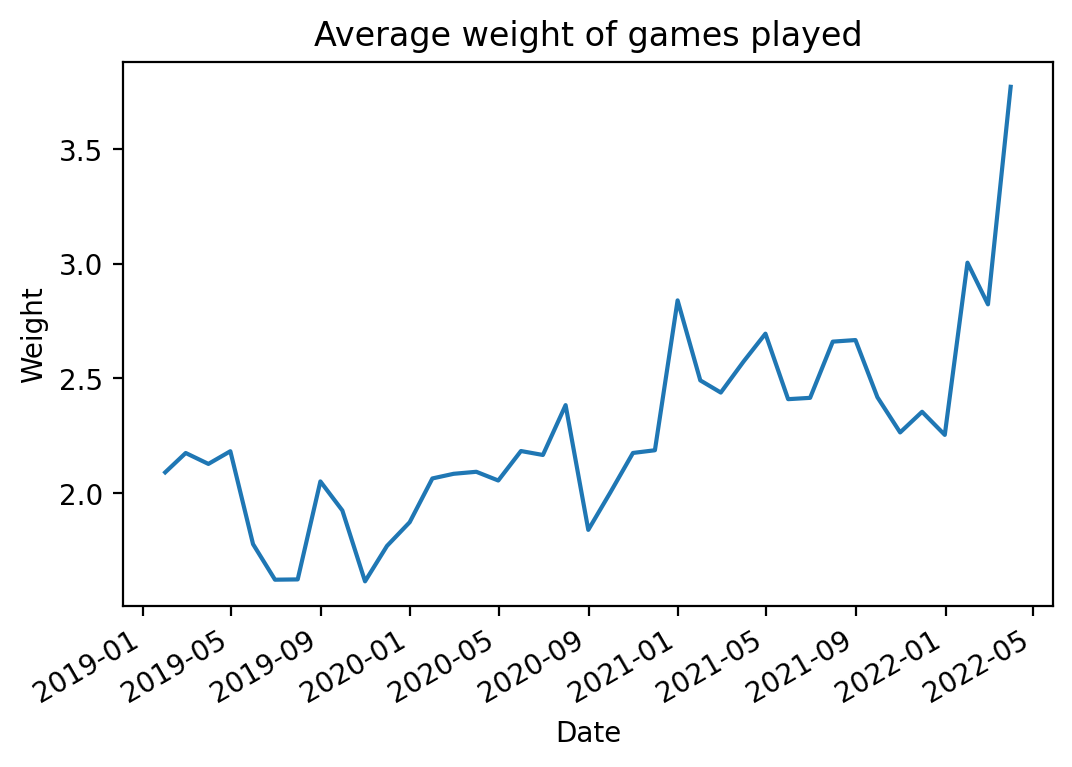

In [79]:

plot_data = stats_plays[["playDate", "weight"]].set_index("playDate").resample("m").mean()

fig, axes = plt.subplots(dpi=200)
plot_data = plot_data[plot_data.index >="01-01-2019"]


axes.plot(plot_data.index, plot_data.weight)

axes.set_ylabel("Weight")
axes.set_xlabel("Date")
axes.set_title("Average weight of games played")

axes.xaxis_date()
fig.autofmt_xdate()
plt.show()

## The Rise of the Annonomous Players

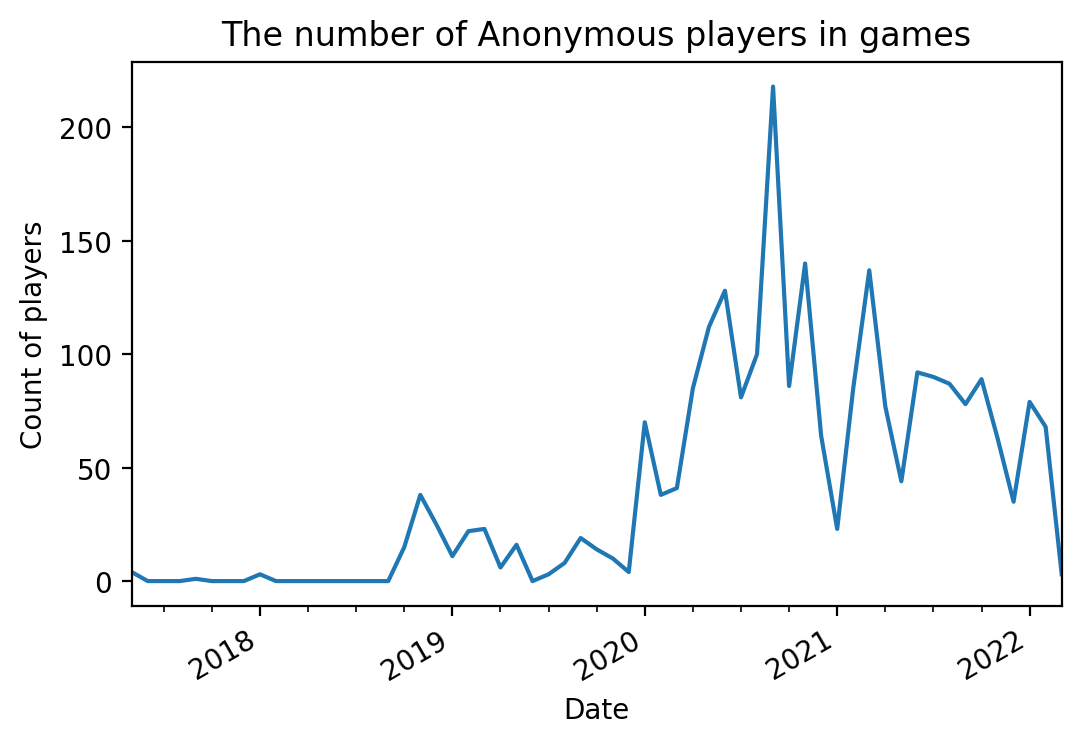

In [90]:
fig, axes = plt.subplots(dpi=200)

player_scores[player_scores["players"] == "Anonymous player"].set_index("play_date").resample("m").count()["name"].plot()
axes.set_xlabel("Date")
axes.set_ylabel("Count of players")
axes.set_title("The number of Anonymous players in games")
fig.autofmt_xdate()

In [99]:
 pd.DataFrame(stats_original_data["games"]).iloc[61]["copies"][0]["metaData"]

# [{'uuid': '5409b3ff-724f-4a2d-92a4-5e746849d8d9', 'modificationDate': '2021-12-25 07:29:14', 'metaData': '{"VersionPublishers":"Roxley","VersionLanguages":"English","VersionEmptiedInApp":0,"PriceP...

'{"VersionPublishers":"Roxley","VersionLanguages":"English","VersionEmptiedInApp":0,"PricePaid":"1650","PricePaidCurrency":"ZAR","PublicComment":"","PrivateComment":"","WishlistComment":"","CurrentPrice":"","CurrentPriceCurrency":"","Barcode":"","AcquiredFrom":"Timeless Boardgames","AcquisitionDate":"","InventoryDate":"","InventoryLocation":"","Quantity":"","HaveParts":"","WantParts":"","Rating":"","TradeCondition":""}'